In [107]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

In [40]:
tracking_data = pd.read_csv("./training/training01.csv")
cap = cv2.VideoCapture("./training/training01.mp4")
fps = cap.get(cv2.CAP_PROP_FPS)
print(tracking_data.iterrows())
for index, row in tracking_data.iterrows():
    print(row)

<generator object DataFrame.iterrows at 0x0000016027B93648>
Unnamed: 0      0.000000
t               0.000000
hexbug          0.000000
x             230.267358
y             528.049741
Name: 0, dtype: float64
Unnamed: 0      1.000000
t               1.000000
hexbug          0.000000
x             233.450777
y             523.274611
Name: 1, dtype: float64
Unnamed: 0      2.000000
t               2.000000
hexbug          0.000000
x             273.243523
y             477.115026
Name: 2, dtype: float64
Unnamed: 0      3.000000
t               3.000000
hexbug          0.000000
x             320.994819
y             435.730570
Name: 3, dtype: float64
Unnamed: 0      4.000000
t               4.000000
hexbug          0.000000
x             376.704663
y             419.813472
Name: 4, dtype: float64
Unnamed: 0      5.000000
t               5.000000
hexbug          0.000000
x             437.189637
y             411.854922
Name: 5, dtype: float64
Unnamed: 0      6.000000
t               6.000

In [41]:
def extract_frames(video_path, csv_path):

    tracking_data = pd.read_csv(csv_path)
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frames_data = []

    for index, row in tracking_data.iterrows():
        # Calculate the frame number
        frame_num = int(row['t'] * fps)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
        ret, frame = cap.read()
        if ret:
            # Save the frame as an image or add it to a list with its metadata
            frame_file_name = f"frame_{frame_num}.jpg"
            cv2.imwrite(frame_file_name, frame)
            frames_data.append({
                'frame': frame_file_name,
                'timeframe': row['t'],
                'hexbug': row['hexbug'],
                'x': row['x'],
                'y': row['y']
            })
    cap.release()
    return pd.DataFrame(frames_data)

In [42]:
data = extract_frames("./training/training01.mp4", "./training/training01.csv")

In [43]:
print(data)

            frame  timeframe  hexbug           x           y
0     frame_0.jpg        0.0     0.0  230.267358  528.049741
1    frame_10.jpg        1.0     0.0  233.450777  523.274611
2    frame_20.jpg        2.0     0.0  273.243523  477.115026
3    frame_30.jpg        3.0     0.0  320.994819  435.730570
4    frame_40.jpg        4.0     0.0  376.704663  419.813472
5    frame_50.jpg        5.0     0.0  437.189637  411.854922
6    frame_60.jpg        6.0     0.0  418.096070  354.487336
7    frame_70.jpg        7.0     0.0  447.608734  295.462009
8    frame_80.jpg        8.0     0.0  517.365939  265.949345
9    frame_90.jpg        9.0     0.0  601.135751  243.133679
10  frame_100.jpg       10.0     0.0  683.710044  249.851528


In [44]:
# Define the paths to the CSV files
csv_files = ['./training/training01.csv', './training/training07.csv', './training/training09.csv']
dataframes = []

# Load each CSV file and append it to the dataframes list
for file in csv_files:
    try:
        df = pd.read_csv(file)
        # Adding a source column to differentiate the data from each CSV
        df['source'] = file.split('/')[-1]
        dataframes.append(df)
    except Exception as e:
        dataframes.append(f"Failed to load: {file} with error {e}")

# Display the first few rows of each DataFrame to check their structure
df_heads = [df.head() for df in dataframes if isinstance(df, pd.DataFrame)]
df_heads, [df for df in dataframes if isinstance(df, str)]  # Show errors if any


([   Unnamed: 0  t  hexbug           x           y          source
  0           0  0       0  230.267358  528.049741  training01.csv
  1           1  1       0  233.450777  523.274611  training01.csv
  2           2  2       0  273.243523  477.115026  training01.csv
  3           3  3       0  320.994819  435.730570  training01.csv
  4           4  4       0  376.704663  419.813472  training01.csv,
     Unnamed: 0  t  hexbug            x           y          source
  0           0  0       0    66.370339   82.339336  training07.csv
  1           1  0       1  1069.869869  942.214847  training07.csv
  2           2  1       0    75.502064   48.620582  training07.csv
  3           3  1       1   985.534498  955.189520  training07.csv
  4           4  2       0    77.789234   49.868129  training07.csv,
     Unnamed: 0  t  hexbug            x           y          source
  0           0  0       0    46.624287  606.293093  training09.csv
  1           1  0       1  1097.765483  508.914624 

In [45]:
print(dataframes)

[     Unnamed: 0    t  hexbug            x           y          source
0             0    0       0   230.267358  528.049741  training01.csv
1             1    1       0   233.450777  523.274611  training01.csv
2             2    2       0   273.243523  477.115026  training01.csv
3             3    3       0   320.994819  435.730570  training01.csv
4             4    4       0   376.704663  419.813472  training01.csv
..          ...  ...     ...          ...         ...             ...
96           96   96       0   900.377202   74.412435  training01.csv
97           97   97       0   954.689956  104.971179  training01.csv
98           98   98       0  1005.430052  138.080829  training01.csv
99           99   99       0  1011.032314  185.460262  training01.csv
100         100  100       0  1025.624454  242.197380  training01.csv

[101 rows x 6 columns],      Unnamed: 0    t  hexbug            x            y          source
0             0    0       0    66.370339    82.339336  trainin

In [46]:
all_data = pd.concat(dataframes)
print(all_data)

     Unnamed: 0    t  hexbug           x            y          source
0             0    0       0  230.267358   528.049741  training01.csv
1             1    1       0  233.450777   523.274611  training01.csv
2             2    2       0  273.243523   477.115026  training01.csv
3             3    3       0  320.994819   435.730570  training01.csv
4             4    4       0  376.704663   419.813472  training01.csv
..          ...  ...     ...         ...          ...             ...
298         298   99       1   58.641385  1017.831988  training09.csv
299         299   99       2  745.288136   348.894915  training09.csv
300         300  100       0  777.555704    84.285038  training09.csv
301         301  100       1  108.823476  1025.435335  training09.csv
302         302  100       2  763.427032   438.770172  training09.csv

[606 rows x 6 columns]


In [47]:
missing_data = all_data.isnull().sum()
print(missing_data)

Unnamed: 0    0
t             0
hexbug        0
x             0
y             0
source        0
dtype: int64


In [48]:
data_types = all_data.dtypes

In [49]:
for hexbug_index in all_data['hexbug'].unique():
    subset = all_data[all_data['hexbug'] == hexbug_index]
    mean_x = subset['x'].mean()
    std_x = subset['x'].std()
    mean_y = subset['y'].mean()
    std_y = subset['y'].std()

In [50]:
outliers = subset[(abs(subset['x'] - mean_x) > 3 * std_x) | (abs(subset['y'] - mean_y) > 3 * std_y)]
all_data = all_data.drop(outliers.index)

In [51]:
def validate_consistency(df):
    df_sorted = df.sort_values(by=['hexbug', 't'])
    df_sorted['delta_x'] = df_sorted.groupby('hexbug')['x'].diff().abs()
    df_sorted['delta_y'] = df_sorted.groupby('hexbug')['y'].diff().abs()
    # Assume thresholds for delta_x and delta_y based on expected max speed
    threshold_x = 10  # Hypothetical max pixels per frame horizontal move
    threshold_y = 10  # Hypothetical max pixels per frame vertical move
    inconsistency = df_sorted[(df_sorted['delta_x'] > threshold_x) | (df_sorted['delta_y'] > threshold_y)]
    return inconsistency

In [52]:
inconsistencies = validate_consistency(all_data)

In [53]:
print("Missing Data:", missing_data)
print("Data Types:", data_types)
print("Detected Inconsistencies:", inconsistencies)

Missing Data: Unnamed: 0    0
t             0
hexbug        0
x             0
y             0
source        0
dtype: int64
Data Types: Unnamed: 0      int64
t               int64
hexbug          int64
x             float64
y             float64
source         object
dtype: object
Detected Inconsistencies:      Unnamed: 0    t  hexbug           x           y          source  \
0             0    0       0   66.370339   82.339336  training07.csv   
0             0    0       0   46.624287  606.293093  training09.csv   
1             1    1       0  233.450777  523.274611  training01.csv   
2             2    1       0   75.502064   48.620582  training07.csv   
3             3    1       0   68.732203  678.386441  training09.csv   
..          ...  ...     ...         ...         ...             ...   
290         290   96       2  600.715405  124.498493  training09.csv   
293         293   97       2  661.816949  206.115254  training09.csv   
296         296   98       2  705.749153  258

In [55]:
stats = all_data.describe()
print(stats)

       Unnamed: 0           t      hexbug            x            y
count  606.000000  606.000000  606.000000   606.000000   606.000000
mean   117.333333   50.000000    0.666667   619.305942   529.240127
std     80.796005   29.178844    0.745972   363.197477   325.219778
min      0.000000    0.000000    0.000000    37.979661     1.193782
25%     50.000000   25.000000    0.000000   312.529298   239.078218
50%    100.500000   50.000000    0.500000   652.515639   533.410169
75%    176.000000   75.000000    1.000000   936.006740   809.939459
max    302.000000  100.000000    2.000000  1226.364597  1045.220339


c:\Users\Abdul_Haseeb\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
No handles with labels found to put in legend.
c:\Users\Abdul_Haseeb\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
No handles with labels found to put in legend.
c:\Users\Abdul_Haseeb\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
No handles with labels found to put in legend.


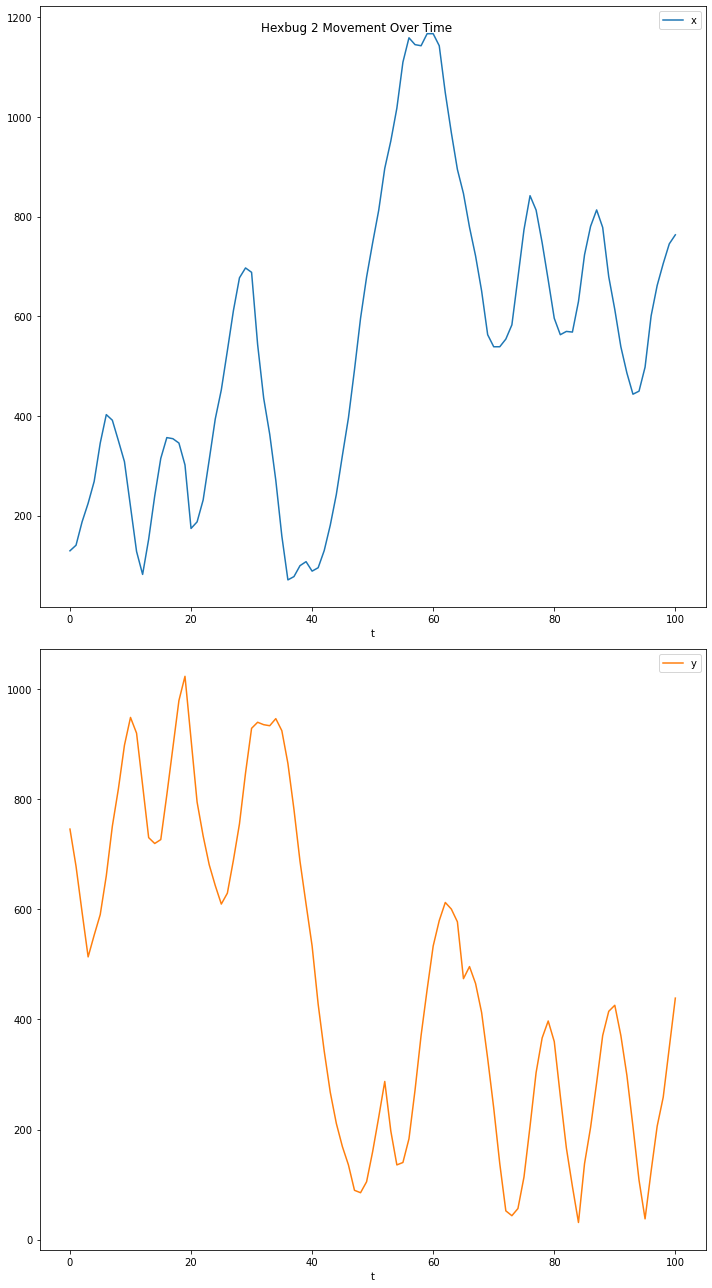

In [57]:
fig, axs = plt.subplots(nrows=len(all_data['hexbug'].unique()), figsize=(10, 6 * len(all_data['hexbug'].unique())))
for index, (hexbug_id, group) in enumerate(all_data.groupby('hexbug')):
    ax = axs[index] if len(all_data['hexbug'].unique()) > 1 else axs
    group.plot(x='t', y=['x', 'y'], subplots=True, ax=ax, title=f"Hexbug {hexbug_id} Movement Over Time")
    ax.legend(loc='best')
plt.tight_layout()

In [73]:
all_data_sorted = all_data.sort_values(by=['hexbug', 't'])
all_data_sorted = all_data_sorted.reset_index(drop=True)
all_data_sorted = all_data_sorted.drop_duplicates(subset=['t', 'hexbug'])

In [74]:
all_data_sorted['delta_x'] = all_data_sorted.groupby('hexbug')['x'].diff().abs()
all_data_sorted['delta_y'] = all_data_sorted.groupby('hexbug')['y'].diff().abs()

In [75]:
all_data_sorted['speed'] = all_data_sorted['delta_x'] + all_data_sorted['delta_y']

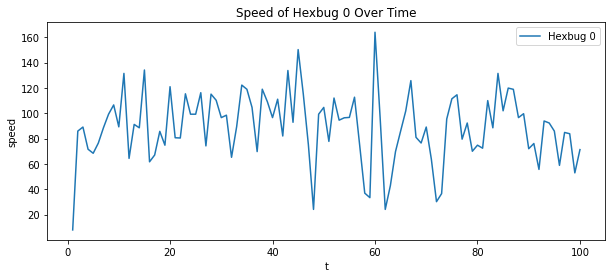

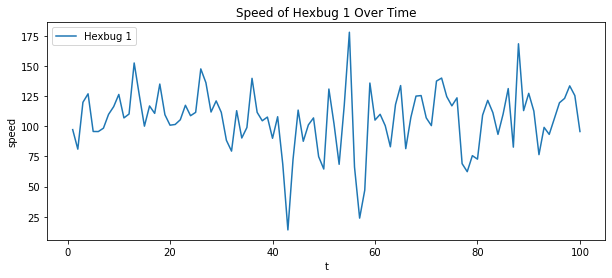

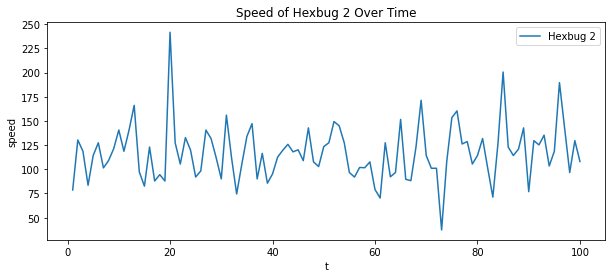

In [76]:
if len(all_data_sorted['hexbug'].unique()) > 1:
    for hexbug_id in all_data_sorted['hexbug'].unique():
        plt.figure(figsize=(10, 4))
        sns.lineplot(data=all_data_sorted[all_data_sorted['hexbug'] == hexbug_id], x='t', y='speed', label=f"Hexbug {hexbug_id}")
        plt.title(f"Speed of Hexbug {hexbug_id} Over Time")
        plt.legend()
else:
    sns.lineplot(data=all_data_sorted, x='t', y='speed')
    plt.title("Speed of Hexbug Over Time")

In [77]:
print(all_data_sorted[['t', 'speed']].isna().sum())

t        0
speed    3
dtype: int64


In [78]:
all_data_sorted = all_data_sorted.dropna(subset=['t', 'speed'])

In [79]:
hexbug_data_segments = {}

In [93]:
for hexbug_id in all_data_sorted['hexbug'].unique():
    # Filter data for the current hexbug
    hexbug_data = all_data_sorted[all_data_sorted['hexbug'] == hexbug_id]
    
    # Store the data in the dictionary
    hexbug_data_segments[hexbug_id] = hexbug_data

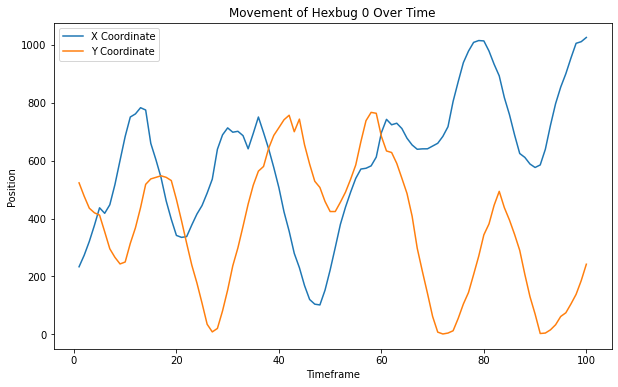

In [91]:
# Example for hexbug with index 0
hexbug_id = 0
plt.figure(figsize=(10, 6))
plt.plot(hexbug_data_segments[hexbug_id]['t'], hexbug_data_segments[hexbug_id]['x'], label='X Coordinate')
plt.plot(hexbug_data_segments[hexbug_id]['t'], hexbug_data_segments[hexbug_id]['y'], label='Y Coordinate')
plt.title(f"Movement of Hexbug {hexbug_id} Over Time")
plt.xlabel('Timeframe')
plt.ylabel('Position')
plt.legend()
plt.show()

In [144]:
def setup_kalman(x, y):
    """Setup the Kalman Filter with more refined noise covariances and transition matrix."""
    kalman = cv2.KalmanFilter(4, 2)
    kalman.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)

    # Adjust the transition matrix if hexbugs have acceleration
    dt = 1  # Assuming 1 time step between the frames, adjust it to your actual frame rate
    kalman.transitionMatrix = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)

    # Fine-tune the process noise covariance matrix
    kalman.processNoiseCov = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32) * 0.03

    # Adjust the measurement noise covariance if the measurements are noisy
    kalman.measurementNoiseCov = np.array([[1, 0], [0, 1]], np.float32) * 0.5

    # Set the initial state
    kalman.statePre = np.array([[np.float32(x)], [np.float32(y)], [0], [0]], np.float32)
    kalman.statePost = np.array([[np.float32(x)], [np.float32(y)], [0], [0]], np.float32)
    return kalman

In [96]:
def track_hexbug(kalman, x, y):
    """Track hexbug using Kalman Filter"""
    measurement = np.array([[np.float32(x)], [np.float32(y)]])
    prediction = kalman.predict()
    estimated = kalman.correct(measurement)
    return prediction, estimated

In [167]:
kalman_filters = {}
for hexbug_id in hexbug_data_segments:
    initial_position = hexbug_data_segments[hexbug_id].iloc[0]
    print(initial_position['x'])
    print("Y:")
    print(initial_position['y'])
    kalman_filters[hexbug_id] = setup_kalman(initial_position['x'], initial_position['y'])


233.4507772020727
523.2746113989637
985.534497816594
955.189519650655
140.4919440631045
678.3164854112617


In [143]:
for index, row in hexbug_data_segments[hexbug_id].iterrows():
    prediction, estimated = track_hexbug(kalman_filters[hexbug_id], row['x'], row['y'])

In [104]:
def plot_tracking_results(data, predictions):
    """Plot actual vs. predicted positions"""
    plt.figure(figsize=(10, 5))
    plt.plot(data['t'], data['x'], 'go-', label='Actual X')
    plt.plot(data['t'], data['y'], 'bo-', label='Actual Y')
    plt.plot(data['t'], predictions[:, 0], 'rx-', label='Predicted X')
    plt.plot(data['t'], predictions[:, 1], 'yx-', label='Predicted Y')
    plt.title('Kalman Filter Tracking Results')
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.legend()
    plt.show()

In [138]:
predictions = np.array([track_hexbug(kalman_filters[0], x, y)[1] for x, y in zip(hexbug_data_segments[0]['x'], hexbug_data_segments[0]['y'])])
corrected_predictions = predictions[:, :2, 0]

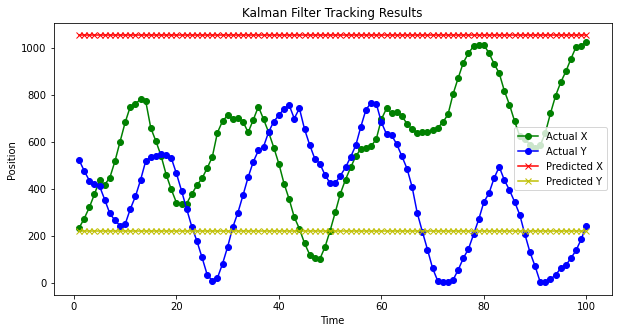

In [139]:
plot_tracking_results(hexbug_data_segments[0], corrected_predictions)

In [141]:
print("Shape of actual data:", hexbug_data_segments[0][['x', 'y']].shape)
print("Shape of predictions:", corrected_predictions.shape)

Shape of actual data: (100, 2)
Shape of predictions: (100, 2)


In [130]:
if corrected_predictions.ndim > 2:
    corrected_predictions = corrected_predictions.reshape((corrected_predictions.shape[0], corrected_predictions.shape[1]))

In [132]:
mse = mean_squared_error(hexbug_data_segments[0][['x', 'y']], corrected_predictions)
rmse = np.sqrt(mse)

In [145]:
estimations = []

for hexbug_id in hexbug_data_segments:
    hexbug_data = hexbug_data_segments[hexbug_id]
    kalman = setup_kalman(hexbug_data.iloc[0]['x'], hexbug_data.iloc[0]['y'])
    for index, row in hexbug_data.iterrows():
        prediction = kalman.predict()
        measurement = np.array([[np.float32(row['x'])], [np.float32(row['y'])]])
        estimation = kalman.correct(measurement)
        estimations.append(estimation)

In [155]:
estimations_array = np.array(estimations).squeeze()
print(hexbug_data.columns)

Index(['Unnamed: 0', 't', 'hexbug', 'x', 'y', 'source', 'delta_x', 'delta_y',
       'speed'],
      dtype='object')


In [158]:
if 't' in hexbug_data.columns:
    actual_measurements = hexbug_data.sort_values('t')[['x', 'x']].to_numpy()

print(actual_measurements.shape)
print(estimations_array.shape)

(100, 2)
(300, 4)


In [161]:
estimations_array = np.array([estimation.flatten() for estimation in estimations])
position_estimates = estimations_array[:, :2]

In [162]:
print("Shape of position estimates:", position_estimates.shape)
print("Shape of actual measurements:", actual_measurements.shape)

Shape of position estimates: (300, 2)
Shape of actual measurements: (100, 2)


In [163]:
if position_estimates.shape == actual_measurements.shape:
    mse = mean_squared_error(actual_measurements, position_estimates)
    rmse = np.sqrt(mse)
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
else:
    print("The shapes still don't match.")

The shapes still don't match.
